# Advancd Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM NM2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA - Twitter Sentiment Classification
Predict an individual’s belief in climate change based on their tweets!

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

Table of Contents

1. Importing Packages

2. Loading Data

3. Exploratory Data Analysis (EDA)

4. Data Engineering

5. Modeling

6. Model Performance

7. Model Explanations

### 1. IMPORTING PACKAGES

* Packages to be imported for our Predict

In [6]:
# Libraries for data loading and data visulisation
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Libraries for modelling


In [14]:
#  Discuss the libraries that will be used throughout your analysis and modelling.
import nltk
import re
sns.set()
nltk.download()
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


### 2.LOADING OF THE DATA

In [8]:
df = pd.read_csv("train.csv")
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
# View data

### 3. EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# Look at stats
# df.info, df.describe, df.isnull, etc



In [ ]:
# Explain What we observed from stats

### 4. DATA / FEATURE ENGINEERING

In [ ]:
# Engineer our features
#Remove stop words, lemmatisation, Feature Extraction etc

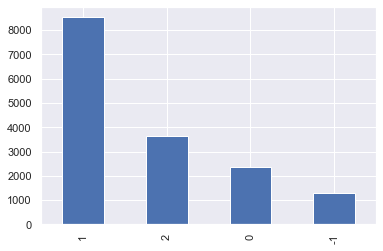

In [9]:

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

stopwords_list = stopwords.words('english')

df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()
df['message'] = df['message'].str.lower()


In [10]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [12]:
df['message'] = df['message'].apply(remove_punctuation)
df['message'].iloc[45]

'rt thetorontosun from sunlorrie indian environmentalist calls out dicaprio in his own documentary on climate changeã¢â‚¬â¦'

In [15]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)
stemmer = SnowballStemmer('english')
stemmers = PorterStemmer()

In [16]:
def tweet_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [17]:
df['stem'] = df['tokens'].apply(tweet_stemmer, args=(stemmer, ))


In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kabel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
def tweet_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [20]:
nltk.download('omw-1.4')
df['lemma'] = df['tokens'].apply(tweet_lemma, args=(lemmatizer, ))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kabel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [22]:
df['stem'] = df['stem'].apply(remove_stop_words)
df['lemma'] = df['lemma'].apply(remove_stop_words)


In [23]:
df['lemma']

0        [polyscimajor, epa, chief, doesnt, think, carb...
1        [like, lack, evidence, anthropogenic, global, ...
2        [rt, rawstory, researcher, say, three, year, a...
3        [todayinmaker, wired, 2016, wa, pivotal, year,...
4        [rt, soynoviodetodas, 2016, racist, sexist, cl...
                               ...                        
15814    [rt, ezlusztig, took, material, global, warmin...
15815    [rt, washingtonpost, climate, change, could, b...
15816    [notiven, rt, nytimesworld, doe, trump, actual...
15817    [rt, sara8smiles, hey, liberal, climate, chang...
15818    [rt, chetcannon, kurteichenwalds, climate, cha...
Name: lemma, Length: 15819, dtype: object

In [4]:
# Explain what features were engineered and reasons

### 5. MODELLING

In [ ]:
# Create some Classification models to Predict an individual’s belief in climate change based on their tweets!

### 6. MODEL PERFORMANCE

In [ ]:
# Compare Model performance and comment on what the best model is and why